## Installation
conda install -c conda-forge specutils

* if some packages in 'specutils' do not exist, try uninstall and reinstall (i.e., update to the latest version)
    * uninstall: conda uninstall specutils
    * install: conda install -c conda-forge specutils

# Specutils: An Astropy package for spectroscopy
document: https://specutils.readthedocs.io/en/stable/index.html

In [1]:
from astropy.io import fits
from astropy import units as u
import numpy as np
from matplotlib import pyplot as plt
from astropy.visualization import quantity_support
import specutils
from specutils import Spectrum1D
quantity_support()

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


<astropy.visualization.units.quantity_support.<locals>.MplQuantityConverter at 0x7fac20818640>

In [2]:
specutils.__version__

'1.10.0'

## Example
reference: https://specutils.readthedocs.io/en/stable/index.html

Text(0.5, 1.0, 'example spectrum')

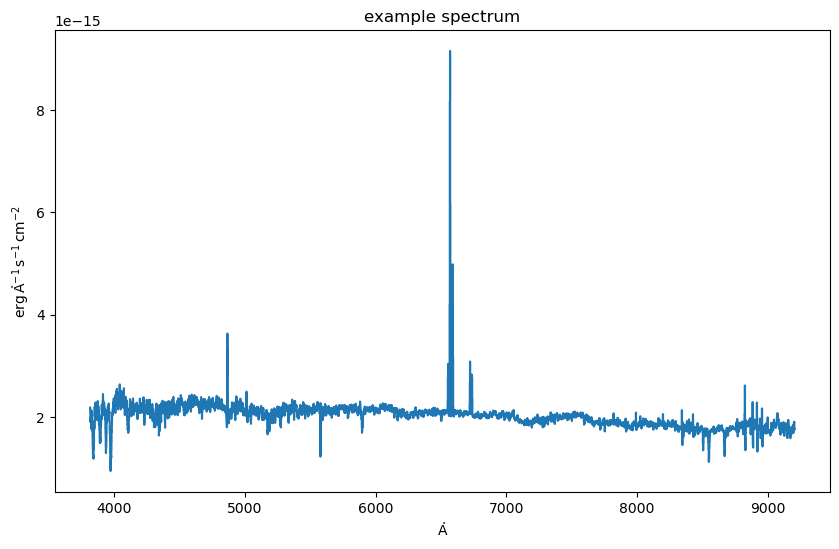

In [3]:
filename = 'https://data.sdss.org/sas/dr16/sdss/spectro/redux/26/spectra/1323/spec-1323-52797-0012.fits'
# The spectrum is in the second HDU of this file.
with fits.open(filename) as f:  
    specdata = f[1].data
    
from specutils import Spectrum1D
lamb = 10**specdata['loglam'] * u.AA 
flux = specdata['flux'] * 10**-17 * u.Unit('erg cm-2 s-1 AA-1') 
spec = Spectrum1D(spectral_axis=lamb, flux=flux)

f, ax = plt.subplots(figsize=(10,6))  
ax.step(spec.spectral_axis, spec.flux)
ax.set_title('example spectrum')

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


(6539.999999999999, 6599.999999999999)

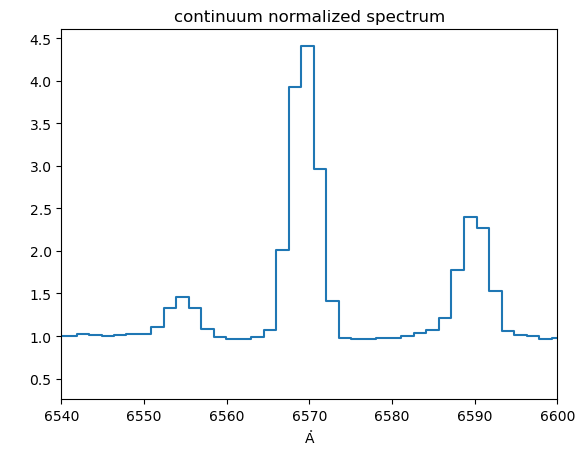

In [4]:
import warnings
from specutils.fitting import fit_generic_continuum
with warnings.catch_warnings():  # Ignore warnings
    warnings.simplefilter('ignore')
    cont_norm_spec = spec / fit_generic_continuum(spec)(spec.spectral_axis) 

f, ax = plt.subplots()  
ax.step(cont_norm_spec.wavelength, cont_norm_spec.flux)
ax.set_title('continuum normalized spectrum')
ax.set_xlim(654 * u.nm, 660 * u.nm)

In [5]:
from specutils import SpectralRegion
from specutils.analysis import equivalent_width
equivalent_width(cont_norm_spec, regions=SpectralRegion(6562 * u.AA, 6575 * u.AA))

<Quantity -14.73962656 Angstrom>

# I. Working with Spectrum1Ds
reference: https://specutils.readthedocs.io/en/stable/spectrum1d.html#multi-dimensional-data-sets

## I-1. Basic Spectrum Creation

Text(0, 0.5, 'Flux')

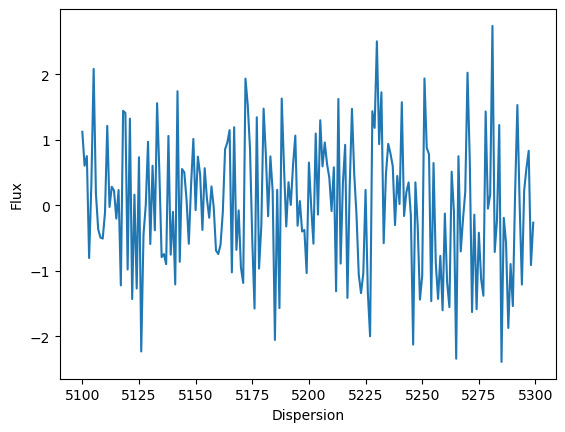

In [6]:
import numpy as np
import astropy.units as u
import matplotlib.pyplot as plt
from specutils import Spectrum1D

flux = np.random.randn(200)*u.Jy
wavelength = np.arange(5100, 5300)*u.AA

spec1d = Spectrum1D(spectral_axis=wavelength, flux=flux)

ax = plt.subplots()[1]
ax.plot(spec1d.spectral_axis, spec1d.flux)
ax.set_xlabel("Dispersion")
ax.set_ylabel("Flux")

* spectral_axis could be:
    * wavelength
    * frequency
    * velocity
    * wavenumber
    * ...

## I-2. Reading from a File

### - method 1

In [7]:
spec1d = Spectrum1D.read("/Users/jaehong/jh/2023_천문관측법_조교/specutils/spec-1323-52797-0012.fits")

print("type: {}\n".format(type(spec1d)))
print("{}\n".format(spec1d))
print("flux: {}\n".format(spec1d.flux))
print("wavelength: {}\n".format(spec1d.wavelength))

type: <class 'specutils.spectra.spectrum1d.Spectrum1D'>

Spectrum1D (length=3827)
flux:             [ 218.23 1e-17 erg / (Angstrom cm2 s), ..., 175.59 1e-17 erg / (Angstrom cm2 s) ],  mean=204.55 1e-17 erg / (Angstrom cm2 s)
spectral axis:    [ 3815.0 Angstrom, ..., 9206.6 Angstrom ],  mean=6120.1 Angstrom
uncertainty:      [ InverseVariance(0.01040728), ..., InverseVariance(0.05215673) ]

flux: [218.22615 215.54787 210.0806  ... 188.33995 190.35242 175.59198] 1e-17 erg / (Angstrom cm2 s)

wavelength: [3815.0483 3815.926  3816.806  ... 9202.379  9204.495  9206.613 ] Angstrom



### - method 2

In [8]:
import urllib
specs = urllib.request.urlopen('https://data.sdss.org/sas/dr16/sdss/spectro/redux/26/spectra/1323/spec-1323-52797-0012.fits') 

spec1d = Spectrum1D.read(specs, format="SDSS-III/IV spec")

print("type: {}\n".format(type(spec1d)))
print("{}\n".format(spec1d))
print("flux: {}\n".format(spec1d.flux))
print("wavelength: {}\n".format(spec1d.wavelength))

type: <class 'specutils.spectra.spectrum1d.Spectrum1D'>

Spectrum1D (length=3827)
flux:             [ 218.23 1e-17 erg / (Angstrom cm2 s), ..., 175.59 1e-17 erg / (Angstrom cm2 s) ],  mean=204.55 1e-17 erg / (Angstrom cm2 s)
spectral axis:    [ 3815.0 Angstrom, ..., 9206.6 Angstrom ],  mean=6120.1 Angstrom
uncertainty:      [ InverseVariance(0.01040728), ..., InverseVariance(0.05215673) ]

flux: [218.22615 215.54787 210.0806  ... 188.33995 190.35242 175.59198] 1e-17 erg / (Angstrom cm2 s)

wavelength: [3815.0483 3815.926  3816.806  ... 9202.379  9204.495  9206.613 ] Angstrom



### - method 3

In [9]:
from astroquery.sdss import SDSS  
specs = SDSS.get_spectra(plate=751, mjd=52251, fiberID=160, data_release=14)  

spec1d = Spectrum1D.read(specs[0], format="SDSS-III/IV spec")  

print("type: {}\n".format(type(spec1d)))
print("{}\n".format(spec1d))
print("flux: {}\n".format(spec1d.flux))
print("wavelength: {}\n".format(spec1d.wavelength))

type: <class 'specutils.spectra.spectrum1d.Spectrum1D'>

Spectrum1D (length=3841)
flux:             [ 30.597 1e-17 erg / (Angstrom cm2 s), ..., 51.703 1e-17 erg / (Angstrom cm2 s) ],  mean=51.88 1e-17 erg / (Angstrom cm2 s)
spectral axis:    [ 3799.3 Angstrom, ..., 9198.1 Angstrom ],  mean=6106.1 Angstrom
uncertainty:      [ InverseVariance(0.06440803), ..., InverseVariance(0.18243204) ]

flux: [30.596626 33.245728 35.89512  ... 53.27969  50.236168 51.702717] 1e-17 erg / (Angstrom cm2 s)

wavelength: [3799.2686 3800.1426 3801.0188 ... 9193.905  9196.0205 9198.141 ] Angstrom



/Users/jaehong/opt/anaconda3/lib/python3.8/site-packages/astroquery/sdss/core.py:862: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


## I-3: Including Uncertainties

In [10]:
from specutils import Spectrum1D
from astropy.nddata import StdDevUncertainty

spec = Spectrum1D(spectral_axis=np.arange(5000, 5010)*u.AA, flux=np.random.sample(10)*u.Jy, uncertainty=StdDevUncertainty(np.random.sample(10) * 0.1))
spec

<Spectrum1D(flux=<Quantity [0.49040181, 0.43498723, 0.66039948, 0.53592973, 0.54751061,
           0.35586843, 0.90988496, 0.87836575, 0.65191482, 0.99397559] Jy>, spectral_axis=<SpectralAxis [5000., 5001., 5002., 5003., 5004., 5005., 5006., 5007., 5008., 5009.] Angstrom>, uncertainty=StdDevUncertainty([0.02232193, 0.07250031, 0.06335244, 0.01399662,
                   0.07552979, 0.05237487, 0.00484745, 0.09800045,
                   0.06291432, 0.07220244]))>

## I-4: Including Redshift or Radial Velocity

In [11]:
print('original setting:')
spec1 = Spectrum1D(spectral_axis=np.arange(5000, 5010)*u.AA, flux=np.random.sample(10)*u.Jy, redshift = 0.15)
print(spec1.spectral_axis)
spec2 = Spectrum1D(spectral_axis=np.arange(5000, 5010)*u.AA, flux=np.random.sample(10)*u.Jy, radial_velocity = 1000*u.Unit("km/s"))
print(spec2.spectral_axis)

print('\nshift_spectrum_to:')
spec1.shift_spectrum_to(redshift=0.5)  # Equivalent: spec1.redshift = 0.5
print(spec1.spectral_axis)
spec2.shift_spectrum_to(radial_velocity=5000 * u.Unit("km/s"))
print(spec2.spectral_axis)

print('\nset_reshift_to or set_radial_velocity_to:')
spec1.set_redshift_to(1)
print(spec1.spectral_axis)
spec2.set_radial_velocity_to(50000 * u.Unit("km/s"))
print(spec2.spectral_axis)

original setting:
[5000. 5001. 5002. 5003. 5004. 5005. 5006. 5007. 5008. 5009.] Angstrom
[5000. 5001. 5002. 5003. 5004. 5005. 5006. 5007. 5008. 5009.] Angstrom

shift_spectrum_to:
[6521.73913043 6523.04347826 6524.34782609 6525.65217391 6526.95652174
 6528.26086957 6529.56521739 6530.86956522 6532.17391304 6533.47826087] Angstrom
[5067.16763967 5068.18107319 5069.19450672 5070.20794025 5071.22137378
 5072.2348073  5073.24824083 5074.26167436 5075.27510789 5076.28854142] Angstrom

set_reshift_to or set_radial_velocity_to:
[6521.73913043 6523.04347826 6524.34782609 6525.65217391 6526.95652174
 6528.26086957 6529.56521739 6530.86956522 6532.17391304 6533.47826087] Angstrom
[5067.16763967 5068.18107319 5069.19450672 5070.20794025 5071.22137378
 5072.2348073  5073.24824083 5074.26167436 5075.27510789 5076.28854142] Angstrom


### Including Masks, Defining WCS, Multi-dimensional Data Sets, Slicing ...

# II. Working with Spectral Cubes
reference: https://specutils.readthedocs.io/en/stable/spectral_cube.html
* 2D spatial image + 1D spectrum: 3D data cube

## II-1. Loading a cube

In [12]:
from astropy.utils.data import download_file
from specutils.spectra import Spectrum1D

filename = "https://stsci.box.com/shared/static/28a88k1qfipo4yxc4p4d40v4axtlal8y.fits"
file = download_file(filename, cache=True)
sc = Spectrum1D.read(file, format='MaNGA cube')

a string value was expected. [astropy.wcs.wcs]
/Users/jaehong/opt/anaconda3/lib/python3.8/site-packages/specutils/spectra/spectrum1d.py:203: UserWarning: Input WCS indicates that the spectral axis is not last. Reshaping arrays to put spectral axis last.
  warnings.warn("Input WCS indicates that the spectral axis is not"


In [13]:
sc.shape

(74, 74, 4563)

$\rightarrow$ The cube has 74$\times$74 spaxels (spatial pixels) with 4563 spectral axis points in each one

In [14]:
sc.spectral_axis_unit

        Use spectral_axis.unit instead. [warnings]


Unit("m")

$\rightarrow$ Unit of this spectral axis is 'meter'

In [15]:
sc[30:33,30:33,2000:2003]

<Spectrum1D(flux=<Quantity [[[0.48920232, 0.4987253 , 0.5098349 ],
            [0.493365  , 0.4964812 , 0.5223962 ],
            [0.49446177, 0.4909543 , 0.5304416 ]],

           [[0.53114057, 0.53538376, 0.5467784 ],
            [0.53761804, 0.533159  , 0.554437  ],
            [0.5470889 , 0.54905874, 0.57109433]],

           [[0.5599331 , 0.554316  , 0.5618426 ],
            [0.5763055 , 0.5668046 , 0.5774939 ],
            [0.59571505, 0.60118765, 0.59942234]]] 1e-17 erg / (Angstrom cm2 s spaxel)>, spectral_axis=<SpectralAxis 
   (observer to target:
      radial_velocity=0.0 km / s
      redshift=0.0)
  [5.73984286e-07, 5.74116466e-07, 5.74248676e-07] m>, uncertainty=InverseVariance([[[4324.235 , 4326.87  , 4268.985 ],
                  [5128.3867, 5142.5005, 4998.457 ],
                  [4529.9097, 4545.8345, 4255.305 ]],

                 [[4786.163 , 4811.216 , 4735.3135],
                  [4992.71  , 5082.1294, 4927.881 ],
                  [4992.9683, 5046.971 , 4798.005 

$\rightarrow$ 3 flux values $\times$ 9 spaxels (spatial pixels): total 27 values

Text(0, 0.5, 'Flux')

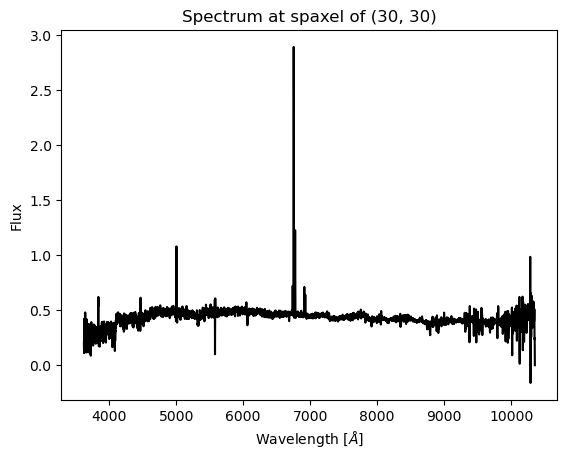

In [16]:
ax = plt.subplots()[1]
ax.plot(sc[30, 30, :].spectral_axis*1e10, sc[30, 30, :].flux, c='k')
ax.set_title("Spectrum at spaxel of (30, 30)")
ax.set_xlabel("Wavelength [$\AA$]")
ax.set_ylabel("Flux")

## II-2. Spectral slab extraction
The spectral_slab function can be used to extract spectral regions from the cube.

In [17]:
import astropy.units as u
from specutils.manipulation import spectral_slab
ss = spectral_slab(sc, 5000.*u.AA, 5003.*u.AA) 
print(ss.shape)

ss[30:33,30:33,::]

(74, 74, 3)


<Spectrum1D(flux=<Quantity [[[0.6103081 , 0.95697385, 1.0791174 ],
            [0.5663384 , 0.8872061 , 1.0814004 ],
            [0.520966  , 0.7819859 , 1.024845  ]],

           [[0.64514536, 0.96376216, 1.083235  ],
            [0.6112465 , 0.89025146, 1.058679  ],
            [0.56316894, 0.77895504, 0.99165994]],

           [[0.65954393, 0.9084677 , 0.9965009 ],
            [0.6255246 , 0.84401435, 0.9930112 ],
            [0.59066033, 0.762025  , 0.9361185 ]]] 1e-17 erg / (Angstrom cm2 s spaxel)>, spectral_axis=<SpectralAxis 
   (observer to target:
      radial_velocity=0.0 km / s
      redshift=0.0)
  [5.00034537e-07, 5.00149688e-07, 5.00264865e-07] m>, uncertainty=InverseVariance([[[3449.242 , 2389.292 , 2225.105 ],
                  [4098.7485, 2965.88  , 2632.497 ],
                  [3589.92  , 2902.7622, 2292.3823]],

                 [[3563.3342, 2586.58  , 2416.039 ],
                  [4090.8855, 3179.1702, 2851.823 ],
                  [4158.919 , 3457.0115, 2841.1965

Text(0, 0.5, 'Flux')

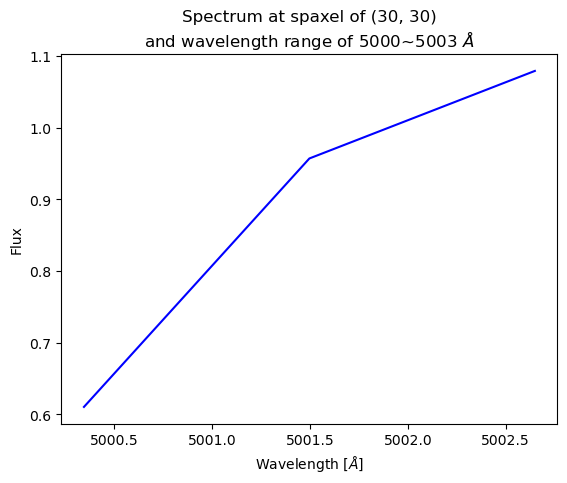

In [18]:
ax = plt.subplots()[1]
ax.plot(ss[30, 30, :].spectral_axis*1e10, ss[30, 30, :].flux, c='b')
ax.set_title("Spectrum at spaxel of (30, 30)\nand wavelength range of 5000~5003 $\AA$")
ax.set_xlabel("Wavelength [$\AA$]")
ax.set_ylabel("Flux")

## II-3. Spectral Bounding Region

In [19]:
from specutils import SpectralRegion
from specutils.manipulation import extract_bounding_spectral_region
composite_region = SpectralRegion([(5000*u.AA, 5002*u.AA), (5006*u.AA, 5008.*u.AA)])
sub_spectrum = extract_bounding_spectral_region(sc, composite_region) 
sub_spectrum.spectral_axis

<SpectralAxis 
   (observer to target:
      radial_velocity=0.0 km / s
      redshift=0.0)
  [5.00034537e-07, 5.00149688e-07, 5.00264865e-07, 5.00380068e-07,
   5.00495298e-07, 5.00610555e-07, 5.00725838e-07] m>

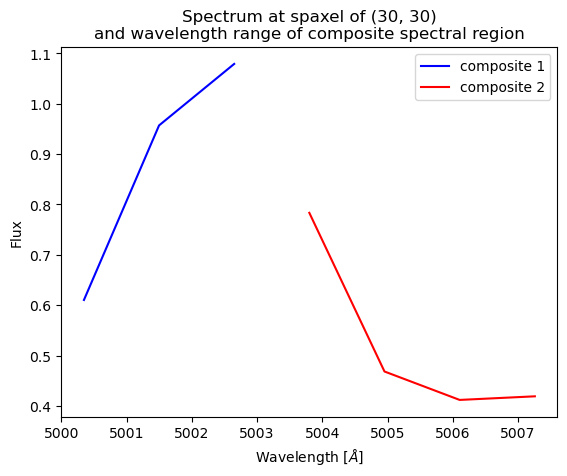

In [20]:
ax = plt.subplots()[1]
ax.plot(sub_spectrum[30, 30, :3].spectral_axis*1e10, sub_spectrum[30, 30, :3].flux, c='b', label='composite 1')
ax.plot(sub_spectrum[30, 30, 3:].spectral_axis*1e10, sub_spectrum[30, 30, 3:].flux, c='r', label='composite 2')
ax.set_title("Spectrum at spaxel of (30, 30)\nand wavelength range of composite spectral region")
ax.set_xlabel("Wavelength [$\AA$]")
ax.set_ylabel("Flux")
ax.legend()

## II-4. Moments

about moments: https://casa.nrao.edu/Release3.4.0/docs/userman/UserManse41.html
* moment 0: integrated value of the spectrum  
* moment 1: intensity weighted coordinate $\rightarrow$ traditionally used to get ’velocity fields’
* moment 2: intensity weighted dispersion of the coordinate $\rightarrow$ traditionally used to get ’velocity dispersion’ 

### moment 0

In [21]:
from specutils.analysis import moment
print("sc shape: {}\n".format(sc.shape))
m0 = moment(sc, order=0) 
print("moment 0 shape: {}\n".format(m0.shape))
print("moment 0 (over whole wavelength range):\n {}\n".format(m0))
print("moment 0 at spaxel [30:33,30:33]:\n{}".format(m0[30:33,30:33]))

sc shape: (74, 74, 4563)

moment 0 shape: (74, 74)

moment 0 (over whole wavelength range):
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] 1e-17 erg / (Angstrom cm2 s spaxel)

moment 0 at spaxel [30:33,30:33]:
[[1952.3552 1979.4755 1986.7565]
 [2087.3977 2102.9895 2161.1938]
 [2155.5762 2223.35   2315.4287]] 1e-17 erg / (Angstrom cm2 s spaxel)


$\rightarrow$ the brightest spaxel among [30:33, 30:33] is [32, 32], value of 2315.4287.

### moment 1

In [22]:
print("sc shape: {}\n".format(sc.shape))
m = moment(sc, order=1) 
print("moment 1 shape: {}\n".format(m.shape))
print("moment 1 (over whole wavelength range):\n {}\n".format(m))

print("{} Angstrom".format(m[30:33,30:33].value*1e10))

sc shape: (74, 74, 4563)

moment 1 shape: (74, 74)

moment 1 (over whole wavelength range):
 [[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]] m

[[6452.61317402 6462.65068917 6481.28165723]
 [6464.67929507 6479.41282558 6514.60998073]
 [6486.72775133 6526.31872372 6567.33086858]] Angstrom


/Users/jaehong/opt/anaconda3/lib/python3.8/site-packages/astropy/units/quantity.py:611: RuntimeWarning: invalid value encountered in divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


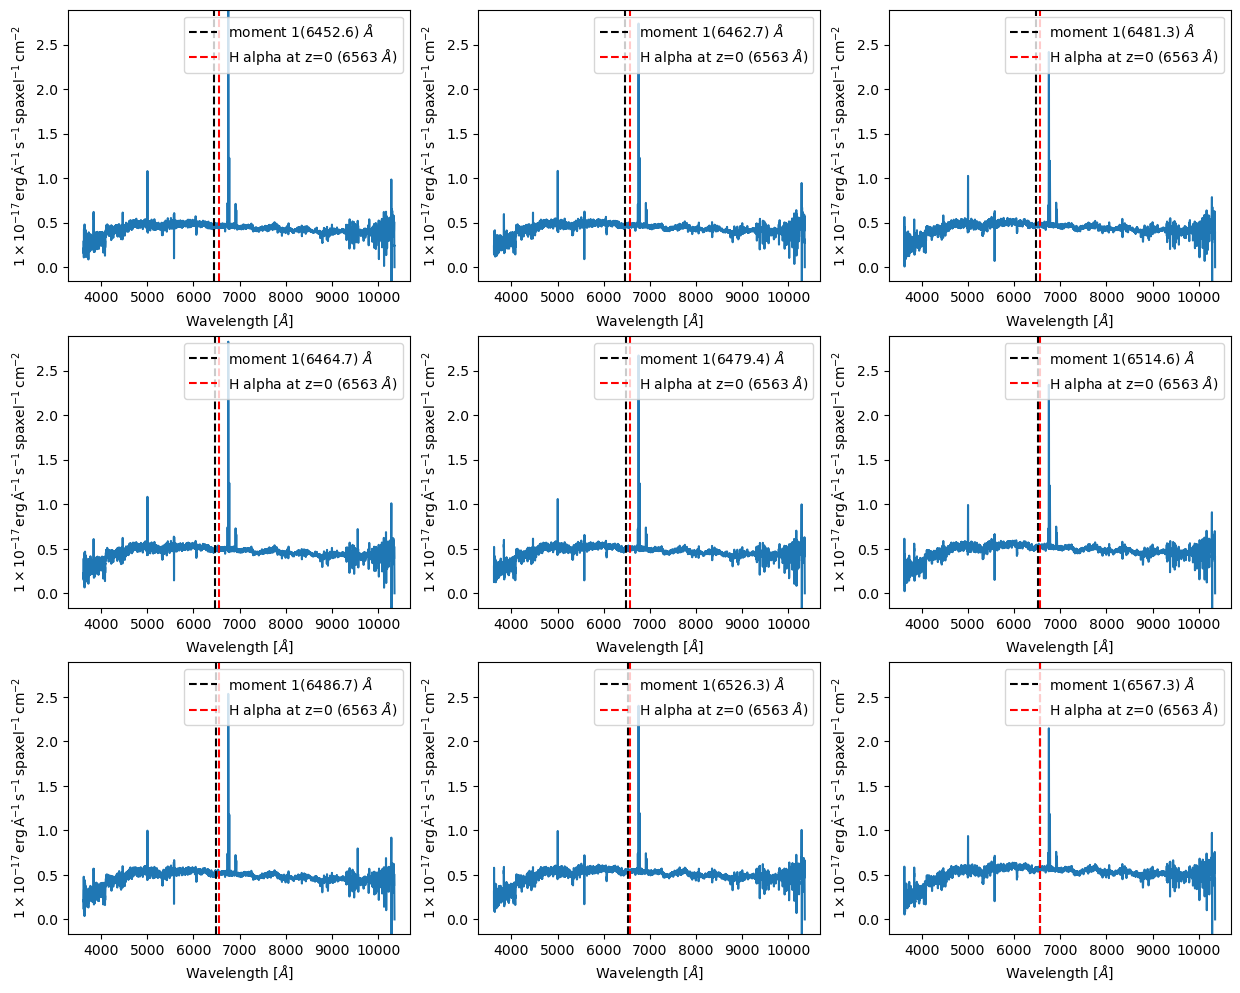

In [23]:
fig, ax = plt.subplots(3, 3, figsize=(3*5, 3*4))
for i in range(3):
    for j in range(3):
        ax[i, j].plot(sc[30+i, 30+j, :].spectral_axis*1e10, sc[30+i, 30+j, :].flux)
        ax[i, j].set_ylim([min(sc[30, 30, :].flux), max(sc[30, 30, :].flux)])
        ax[i, j].axvline(x=m[30+i,30+j].value*1e10, ls='--', c='k', label='moment 1({:.1f}) $\AA$'.format(m[30+i,30+j].value*1e10))
        ax[i, j].axvline(x=6563, ls='--', c='r', label='H alpha at z=0 (6563 $\AA$)')
        ax[i, j].set_xlabel("Wavelength [$\AA$]")
        ax[i, j].legend()

$\rightarrow$ the most blue-shifted spaxel among [30:33, 30:33] is [30, 30], value of 6452.6 Angstrom.

## II-5. Use Case

a string value was expected. [astropy.wcs.wcs]
/Users/jaehong/opt/anaconda3/lib/python3.8/site-packages/specutils/spectra/spectrum1d.py:203: UserWarning: Input WCS indicates that the spectral axis is not last. Reshaping arrays to put spectral axis last.
  warnings.warn("Input WCS indicates that the spectral axis is not"


spec shape: (74, 74, 4563)

subspec shape: (74, 74, 13)



/Users/jaehong/opt/anaconda3/lib/python3.8/site-packages/astropy/units/quantity.py:611: RuntimeWarning: invalid value encountered in divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


subspec_wide shape: (74, 74, 65)

h alpha flux (over whole spaxels): [0.000603   0.00056514 0.00060918 0.00081698 0.00112461 0.00132214
 0.00135893 0.0013588  0.00127405 0.00099207 0.00070127 0.00057755
 0.00056347] Jy

h alpha + [N II] flux (over whole spaxels): [0.00059711 0.00059765 0.00061359 0.00060334 0.00060105 0.0005995
 0.00060372 0.00060931 0.00060515 0.00060226 0.00059755 0.00060024
 0.0006006  0.00060518 0.0006052  0.00060508 0.00061074 0.00060609
 0.00060177 0.00062301 0.00066609 0.00069764 0.00070389 0.0007092
 0.0006931  0.00064985 0.000603   0.00056514 0.00060918 0.00081698
 0.00112461 0.00132214 0.00135893 0.0013588  0.00127405 0.00099207
 0.00070127 0.00057755 0.00056347 0.00056896 0.00057253 0.00057587
 0.00063    0.00075689 0.00088826 0.00095038 0.00096512 0.0009594
 0.00088658 0.0007338  0.00062021 0.0005854  0.00057143 0.00057699
 0.00058685 0.00058275 0.00058624 0.00059103 0.00059145 0.00059179
 0.00058911 0.00058391 0.00058259 0.00058562 0.00058717] Jy

moment 0

Text(0.5, 0, 'x pixels')

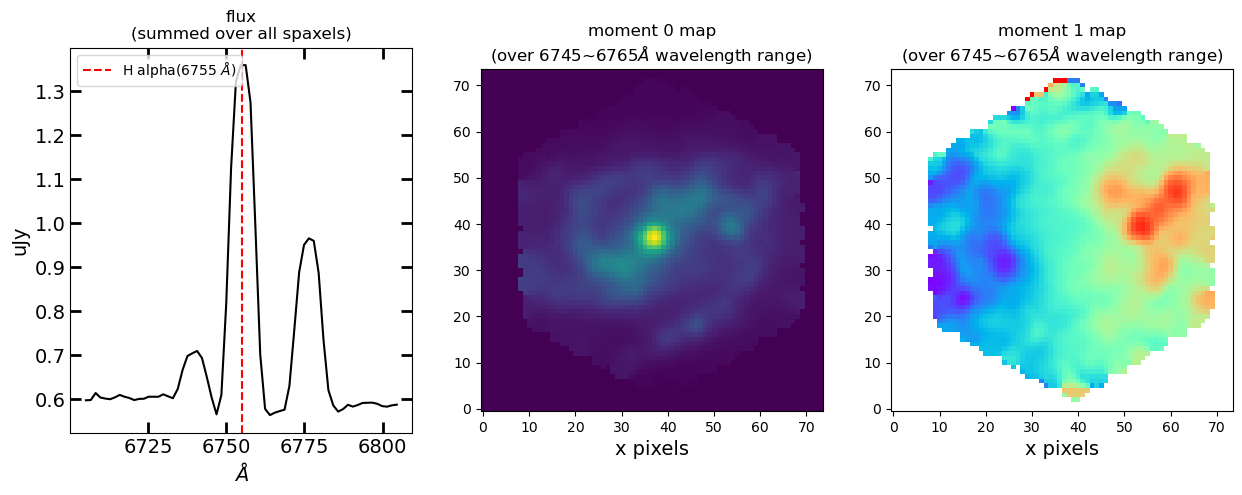

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u
from astropy.utils.data import download_file
from specutils import Spectrum1D, SpectralRegion
from specutils.analysis import moment
from specutils.manipulation import spectral_slab
           
filename = "https://stsci.box.com/shared/static/28a88k1qfipo4yxc4p4d40v4axtlal8y.fits"
fn = download_file(filename, cache=True)
spec1d = Spectrum1D.read(fn)
print("spec shape: {}\n".format(spec1d.shape))

# Extract H-alpha sub-cube for moment maps using spectral_slab
subspec = spectral_slab(spec1d, 6745.*u.AA, 6765*u.AA)
ha_wave = subspec.spectral_axis
print("subspec shape: {}\n".format(subspec.flux.shape))

# Extract wider sub-cube covering H-alpha and [N II] using spectral_slab
subspec_wide = spectral_slab(spec1d, 6705.*u.AA, 6805*u.AA)
ha_wave_wide= subspec_wide.spectral_axis
print("subspec_wide shape: {}\n".format(subspec_wide.flux.shape))

# Convert flux density to microJy and correct negative flux offset for this particular dataset
ha_flux = (np.sum(subspec.flux.value, axis=(0,1)) + 0.0093) * 1.0E-6*u.Jy
ha_flux_wide = (np.sum(subspec_wide.flux.value, axis=(0,1)) + 0.0093) * 1.0E-6*u.Jy
print('h alpha flux (over whole spaxels): {}\n'.format(ha_flux))
print('h alpha + [N II] flux (over whole spaxels): {}\n'.format(ha_flux_wide))

# Compute moment maps for H-alpha line
moment0_halpha = moment(subspec, order=0)
moment1_halpha = moment(subspec, order=1)
print("moment 0 (over 6745~6765AA wavelength range):\n {}\n".format(moment0_halpha))
print("moment 1 (over 6745~6765AA wavelength range):\n {}\n".format(moment1_halpha))

# Convert moment1 from AA to velocity
# H-alpha is redshifted to 6755 AA for this galaxy
print("moment 1 at spaxel [40,40]: {}\n".format(moment1_halpha[40,40]))
vel_map = 3.0E5 * (moment1_halpha.value - 6.755E-7) / 6.755E-7 # km/s

# Plot results in 3 panels (subspec_wide,  H-alpha line flux, H-alpha velocity map)
f,(ax1,ax2,ax3) = plt.subplots(1, 3, figsize=(15, 5))
ax1.plot(ha_wave_wide*1e10, (ha_flux_wide)*1000., c='k')
ax1.set_xlabel('$\AA$', fontsize=14)
ax1.set_ylabel('uJy', fontsize=14)
ax1.axvline(x=6755, label='H alpha(6755 $\AA$)', ls='--', c='r')
ax1.tick_params(axis="both", which='major', labelsize=14, length=8, width=2, direction='in', top=True, right=True)
ax1.set_title('flux\n(summed over all spaxels)')
ax1.legend(loc='upper left')
ax2.imshow(moment0_halpha.value, origin='lower')
ax2.set_title('moment 0 map\n(over 6745~6765$\AA$ wavelength range)')
ax2.set_xlabel('x pixels', fontsize=14)
ax3.imshow(vel_map, vmin=-100., vmax=100., cmap='rainbow', origin='lower')
ax3.set_title('moment 1 map\n(over 6745~6765$\AA$ wavelength range)')
ax3.set_xlabel('x pixels', fontsize=14)

* The moment 0 map shows in which part of the galaxy the star forming region is located.
* The moment 1 map shows the rotation of the galaxy.

# III. Analysis
reference: https://specutils.readthedocs.io/en/stable/analysis.html

## III-1. creating a model spectral line for practice

Text(0.5, 1.0, 'spectral line for practice')

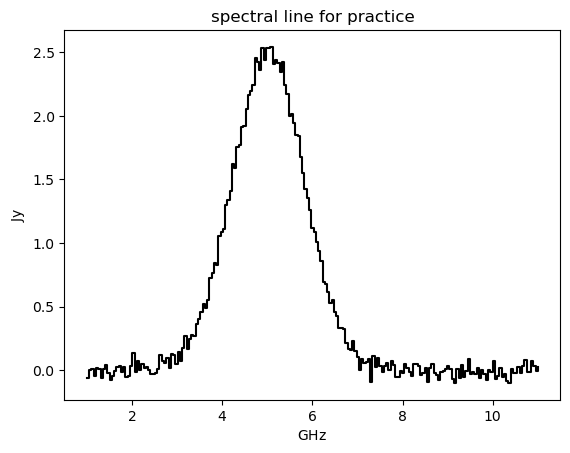

In [25]:
import numpy as np
from astropy import units as u
from astropy.nddata import StdDevUncertainty
from astropy.modeling import models
from specutils import Spectrum1D, SpectralRegion
import matplotlib.pyplot as plt 

np.random.seed(42)
spectral_axis = np.linspace(11., 1., 200) * u.GHz
spectral_model = models.Gaussian1D(amplitude=5*(2*np.pi*0.8**2)**-0.5*u.Jy, mean=5*u.GHz, stddev=0.8*u.GHz)

flux = spectral_model(spectral_axis)
flux += np.random.normal(0., 0.05, spectral_axis.shape) * u.Jy
uncertainty = StdDevUncertainty(0.2*np.ones(flux.shape)*u.Jy)

noisy_gaussian = Spectrum1D(spectral_axis=spectral_axis, flux=flux, uncertainty=uncertainty)

plt.step(noisy_gaussian.spectral_axis, noisy_gaussian.flux, c='k') 
plt.title('spectral line for practice')

## III-2. SNR (signal to noise ratio)

In [26]:
from specutils.analysis import snr

print(snr(noisy_gaussian))
print(snr(noisy_gaussian, SpectralRegion(6*u.GHz, 4*u.GHz)))

2.4773066557399983
9.830087299340123


## III-3. Line Flux Estimates

### - line flux
* Flux in the provided spectrum (or regions). Unit is the spectrum’s [flux unit] times [spectral_axis unit].
* The line_flux function assumes the spectrum has already been continuum-subtracted.

In [27]:
from specutils.analysis import line_flux

print('line flux: {:.4f}'.format(line_flux(noisy_gaussian, SpectralRegion(7*u.GHz, 3*u.GHz))))
print('line flux uncertainty: {:.4f}\n'.format(line_flux(noisy_gaussian, SpectralRegion(7*u.GHz, 3*u.GHz)).uncertainty))
print('line flux: {:.4e}'.format(line_flux(noisy_gaussian).to(u.erg * u.cm**-2 * u.s**-1)))
print('line flux uncertainty: {:.4e}'.format(line_flux(noisy_gaussian).uncertainty.to(u.erg * u.cm**-2 * u.s**-1)))

line flux: 4.9378 GHz Jy
line flux uncertainty: 0.0899 GHz Jy

line flux: 4.9795e-14 erg / (cm2 s)
line flux uncertainty: 1.4213e-15 erg / (cm2 s)


### - equivalent width
* For the equivalent width, note the need to add a continuum level

In [28]:
from specutils.analysis import equivalent_width

noisy_gaussian_with_continuum = noisy_gaussian + 1*u.Jy

print(equivalent_width(noisy_gaussian_with_continuum))
print(equivalent_width(noisy_gaussian_with_continuum, regions=SpectralRegion(7*u.GHz, 3*u.GHz)))

-4.979510865809041 GHz
-4.937848741441899 GHz


## III-4. Centroid

In [29]:
from specutils.analysis import centroid

print("centroid of the spectral line: {:4f}".format(centroid(noisy_gaussian, SpectralRegion(7*u.GHz, 3*u.GHz))))

centroid of the spectral line: 4.999092 GHz


## III-5. Moment
* since we don't have spectral cube data as above (see II-5. Use Case), we can compute moments, but we can't draw moment maps.
* about moments: https://casa.nrao.edu/Release3.4.0/docs/userman/UserManse41.html
    * moment 0: integrated value of the spectrum  
    * moment 1: intensity weighted coordinate $\rightarrow$ traditionally used to get ’velocity fields’
    * moment 2: intensity weighted dispersion of the coordinate $\rightarrow$ traditionally used to get ’velocity dispersion’ 

In [30]:
from specutils.analysis import moment

print("moment 0: {}".format(moment(noisy_gaussian, SpectralRegion(7*u.GHz, 3*u.GHz))))
print("moment 1: {}".format(moment(noisy_gaussian, SpectralRegion(7*u.GHz, 3*u.GHz), order=1)))
print("moment 2: {}".format(moment(noisy_gaussian, SpectralRegion(7*u.GHz, 3*u.GHz), order=2)))

moment 0: 98.26318995469377 Jy
moment 1: 4.999091509500502 GHz
moment 2: 0.5858669537838598 GHz2


## III-6. Line widths

There are several width statistics that are provided by the specutils.analysis submodule.

* gaussian_sigma_width: The 'gaussian_sigma_width' function estimates the width of the spectrum by computing a second-moment-based approximation of the standard deviation.

* gaussian_fwhm: The 'gaussian_fwhm' function estimates the width of the spectrum at half max, again by computing an approximation of the standard deviation.

** Both of above functions assume that the spectrum is approximately gaussian.

* fwhm: The function 'fwhm' provides an estimate of the full width of the spectrum at half max that does not assume the spectrum is gaussian. It locates the maximum, and then locates the value closest to half of the maximum on either side, and measures the distance between them.

* fwzi: A function to calculate the full width at zero intensity (i.e. the width of a spectral feature at the continuum) is provided as 'fwzi'. Like the fwhm calculation, it does not make assumptions about the shape of the feature and calculates the width by finding the points at either side of maximum that reach the continuum value. In this case, it assumes the provided spectrum has been continuum subtracted.

In [31]:
from specutils.analysis import gaussian_sigma_width, gaussian_fwhm, fwhm, fwzi

print(gaussian_sigma_width(noisy_gaussian))

print(gaussian_fwhm(noisy_gaussian))

print(fwhm(noisy_gaussian))

print(fwzi(noisy_gaussian))

0.7407543142214599 GHz
1.744343107571848 GHz
1.8604766629181038 GHz
94.99997483835863 GHz


### Template comparison, Dust extinction, Template Cross-correlation ...

# IV. Line/Spectrum Fitting
https://specutils.readthedocs.io/en/stable/fitting.html

## IV-1. Line Finding

In [32]:
import numpy as np
from astropy.modeling import models
import astropy.units as u
from specutils import Spectrum1D, SpectralRegion

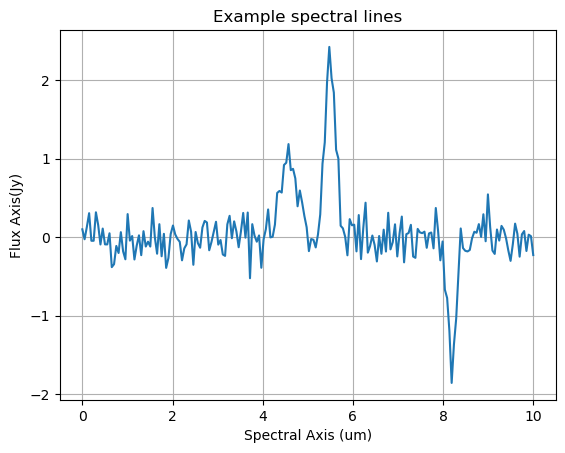

In [33]:
np.random.seed(42)
g1 = models.Gaussian1D(1, 4.6, 0.2)
g2 = models.Gaussian1D(2.5, 5.5, 0.1)
g3 = models.Gaussian1D(-1.7, 8.2, 0.1)
x = np.linspace(0, 10, 200)
y = g1(x) + g2(x) + g3(x) + np.random.normal(0., 0.2, x.shape)

spectrum = Spectrum1D(flux=y*u.Jy, spectral_axis=x*u.um)

from matplotlib import pyplot as plt
plt.plot(spectrum.spectral_axis, spectrum.flux) 
plt.xlabel('Spectral Axis ({})'.format(spectrum.spectral_axis.unit)) 
plt.ylabel('Flux Axis({})'.format(spectrum.flux.unit)) 
plt.title('Example spectral lines')
plt.grid(True) 

### - using 'find_lines_threshold'
* While we know the true uncertainty here, this is often not the case with real data. 
* Therefore, since find_lines_threshold requires an uncertainty, we will produce an estimate of the uncertainty by calling the noise_region_uncertainty function:

In [34]:
from specutils.manipulation import noise_region_uncertainty

noise_region = SpectralRegion(0*u.um, 3*u.um)
spectrum = noise_region_uncertainty(spectrum, noise_region)

from specutils.fitting import find_lines_threshold

lines = find_lines_threshold(spectrum, noise_factor=3)  

print('=== emission lines:===\n {}\n'.format(lines[lines['line_type'] == 'emission']))
print('=== absorption lines:===\n {}'.format(lines[lines['line_type'] == 'absorption']))

=== emission lines:===
    line_center    line_type line_center_index
        um                                   
----------------- --------- -----------------
4.572864321608041  emission                91
4.824120603015076  emission                96
5.477386934673367  emission               109
 8.99497487437186  emission               179

=== absorption lines:===
    line_center    line_type  line_center_index
        um                                    
----------------- ---------- -----------------
8.190954773869347 absorption               163



If you want to suppress this warning either type 'specutils.conf.do_continuum_function_check = False' or see http://docs.astropy.org/en/stable/config/#adding-new-configuration-items for other ways to configure the warning. [specutils.analysis.flux]


### - using 'find_lines_derivative'

In [35]:
# Define a noise region for adding the uncertainty
noise_region = SpectralRegion(0*u.um, 3*u.um)

# Derivative technique
from specutils.fitting import find_lines_derivative

lines = find_lines_derivative(spectrum, flux_threshold=0.75)  

print('=== emission lines:===\n {}\n'.format(lines[lines['line_type'] == 'emission']))
print('=== absorption lines:===\n {}'.format(lines[lines['line_type'] == 'absorption']))

=== emission lines:===
    line_center    line_type line_center_index
        um                                   
----------------- --------- -----------------
4.522613065326634  emission                90
5.477386934673367  emission               109

=== absorption lines:===
    line_center    line_type  line_center_index
        um                                    
----------------- ---------- -----------------
8.190954773869347 absorption               163



If you want to suppress this warning either type 'specutils.conf.do_continuum_function_check = False' or see http://docs.astropy.org/en/stable/config/#adding-new-configuration-items for other ways to configure the warning. [specutils.analysis.flux]


## IV-2. Parameter Estimation

In [36]:
from specutils import SpectralRegion
from specutils.fitting import estimate_line_parameters
from specutils.manipulation import extract_region

sub_region = SpectralRegion(4*u.um, 5*u.um)
sub_spectrum = extract_region(spectrum, sub_region)

In [37]:
print(estimate_line_parameters(sub_spectrum, models.Gaussian1D()))  

Model: Gaussian1D
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Parameters:
        amplitude            mean              stddev      
            Jy                um                 um        
    ------------------ ---------------- -------------------
    1.1845669151078486 4.57517271067525 0.19373372929165977


In [38]:
from specutils import SpectralRegion
from specutils.fitting import estimate_line_parameters
from specutils.manipulation import extract_region
from specutils.analysis import centroid, fwhm

sub_region = SpectralRegion(4*u.um, 5*u.um)
sub_spectrum = extract_region(spectrum, sub_region)

ricker = models.RickerWavelet1D()
ricker.amplitude.estimator = lambda s: max(s.flux)
ricker.x_0.estimator = lambda *args: centroid(args[0], region=None)
ricker.sigma.estimator = lambda *args: fwhm(args[0])

print(estimate_line_parameters(spectrum, ricker))

Model: RickerWavelet1D
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Parameters:
        amplitude             x_0                sigma       
            Jy                 um                  um        
    ------------------ ------------------ -------------------
    2.4220683957581444 3.6045476935889367 0.24416769183724707


/Users/jaehong/opt/anaconda3/lib/python3.8/site-packages/astropy/units/quantity.py:611: RuntimeWarning: invalid value encountered in divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


## IV-3. Model (Line) Fitting

### simple example

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


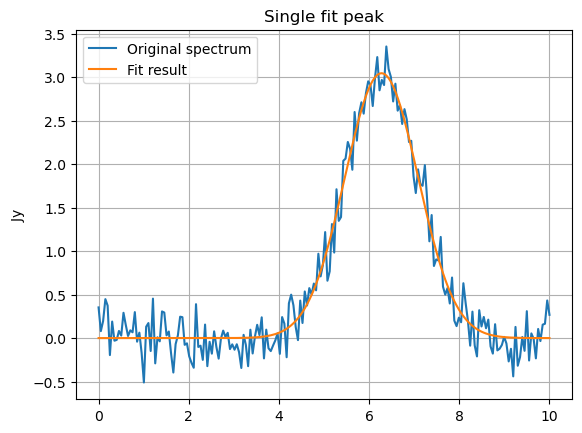

In [39]:
import numpy as np
import matplotlib.pyplot as plt

from astropy.modeling import models
from astropy import units as u

from specutils.spectra import Spectrum1D
from specutils.fitting import fit_lines

# Create a simple spectrum with a Gaussian.
np.random.seed(0)
x = np.linspace(0., 10., 200)
y = 3 * np.exp(-0.5 * (x- 6.3)**2 / 0.8**2)
y += np.random.normal(0., 0.2, x.shape)
spectrum_line_fit = Spectrum1D(flux=y*u.Jy, spectral_axis=x*u.um)

# Fit the spectrum and calculate the fitted flux values (``y_fit``)
g_init = models.Gaussian1D(amplitude=3.*u.Jy, mean=6.1*u.um, stddev=1.*u.um)
g_fit = fit_lines(spectrum_line_fit, g_init)
y_fit = g_fit(x*u.um)

# Plot the original spectrum and the fitted.
plt.plot(x, y, label="Original spectrum")
plt.plot(x, y_fit, label="Fit result")
plt.title('Single fit peak')
plt.grid(True)
plt.legend()

### various cases
* Single Peak Fit Within a Window (Defined by Center)
* Single Peak Fit Within a Window (Defined by Left and Right)
* Double Peak Fit
* Double Peak Fit Within a Window
* Double Peak Fit Within Around a Center Window
* Double Peak Fit - Two Separate Peaks
* Double Peak Fit - Two Separate Peaks With Two Windows
* Double Peak Fit - Exclude One Region

## IV-4. Continuum Fitting
* While the line-fitting machinery can be used to fit continuua at the same time as models, often it is convenient to subtract or normalize a spectrum by its continuum before other processing is done. specutils provides some convenience functions to perform exactly this task. An example is shown below.

In [40]:
import warnings
import numpy as np
import matplotlib.pyplot as plt
from astropy.modeling import models
from astropy import units as u
from specutils.spectra import Spectrum1D, SpectralRegion
from specutils.fitting import fit_generic_continuum

np.random.seed(0)
x = np.linspace(0., 10., 200)
y = 3 * np.exp(-0.5 * (x - 6.3)**2 / 0.1**2)
y += np.random.normal(0., 0.2, x.shape)

y_continuum = 3.2 * np.exp(-0.5 * (x - 5.6)**2 / 4.8**2)
y += y_continuum

spectrum_cont_fit = Spectrum1D(flux=y*u.Jy, spectral_axis=x*u.um)

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


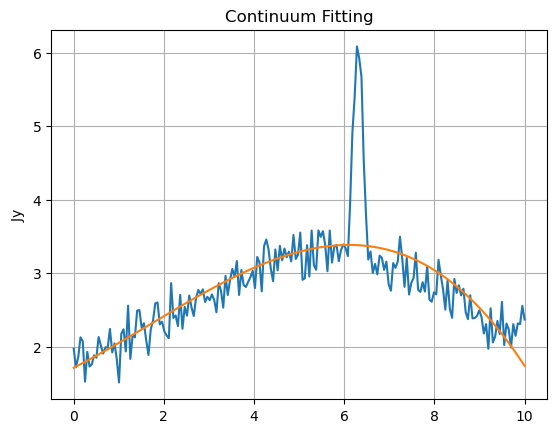

In [41]:
with warnings.catch_warnings():  # Ignore warnings
    warnings.simplefilter('ignore')
    g1_fit = fit_generic_continuum(spectrum_cont_fit)
    
y_continuum_fitted = g1_fit(x*u.um)

f, ax = plt.subplots()  
ax.plot(x, y)  
ax.plot(x, y_continuum_fitted)  
ax.set_title("Continuum Fitting")  
ax.grid(True)  